In [185]:
import numpy as np
import matplotlib.pyplot as plt

## Ejercicio 1

In [18]:
matrix = np.arange(0, 20).reshape((4,5))

In [10]:
# norma l0
l0 = np.linalg.norm(matrix, ord=0, axis=1)
print(l0)
# norma l1
l1 = np.linalg.norm(matrix, ord=1, axis=1)
print(l1)
# norma l2
l2 = np.linalg.norm(matrix, ord=2, axis=1)
print(l2)
# norma inf
linf = np.linalg.norm(matrix, ord=np.inf, axis=1)
print(linf)

[4. 5. 5. 5.]
[10. 35. 60. 85.]
[ 5.47722558 15.96871942 27.01851217 38.14446225]
[ 4.  9. 14. 19.]


## Ejercicio 2

In [32]:
A_bis = np.random.rand(3,4)
print(f"A: {A_bis}\n")
l2 = np.linalg.norm(A_bis, ord=2, axis=1)
print(f"l2: {l2}\n")
arg_l2_sorted = np.argsort(l2)[::-1]
print(arg_l2_sorted)
A_bis[arg_l2_sorted]

A: [[0.25583584 0.28229899 0.36409929 0.20626863]
 [0.41094928 0.74518039 0.2894102  0.09987182]
 [0.27279161 0.61941064 0.00080131 0.1591652 ]]

l2: [0.56591496 0.90438143 0.6952834 ]

[1 2 0]


array([[0.41094928, 0.74518039, 0.2894102 , 0.09987182],
       [0.27279161, 0.61941064, 0.00080131, 0.1591652 ],
       [0.25583584, 0.28229899, 0.36409929, 0.20626863]])

## Ejercicio 3

In [38]:
import indentificador

user_ids = np.random.randint(1, size=100)
ident = indentificador.Identificador(user_ids)

choice = np.random.choice(user_ids)

ident.id2idx[choice]


99

## Ejercicio 4

In [41]:
truth = np.array([1,1,0,1,1,1,0,0,0,1])
prediction = np.array([1,1,1,1,0,0,1,1,0,0])

# True positive:
TP = np.sum(np.logical_and(truth == 1, prediction == 1))

# True negative:
TN = np.sum(np.logical_and(truth == 0, prediction == 0))

# False positive:
FP = np.sum(np.logical_and(truth == 0, prediction == 1))

# False negative:
FN = np.sum(np.logical_and(truth == 1, prediction == 0))

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Accuracy = (TP + TN) / (TP + TN + FP + FN)

print(f"Precision: {Precision}")
print(f"Recall: {Recall}")
print(f"Accuracy: {Accuracy}")

Precision: 0.5
Recall: 0.5
Accuracy: 0.4


## Ejercicio 5

In [67]:
q_id =             np.array([[1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4]])
predicted_rank =   np.array([[0, 1, 2, 3, 0, 1, 2, 0, 1, 2, 3, 4, 0, 1, 2, 3]])
truth_relevance =  np.array([[True, False, True, False, True, True, True, False, False, False, False, False, True, False, False, True]])

concatenated = np.concatenate((q_id, predicted_rank, truth_relevance), axis=0)

unique_values = np.unique(q_id) 

sum_aux = 0
for unique_value in unique_values:
    filtered = concatenated[:,concatenated[0,:] == unique_value]
    sum_aux += np.sum(filtered[2,:]) / len(filtered[2,:])

average_query_precision = sum_aux / len(unique_values)
average_query_precision

0.5

## Ejercicio 6

In [33]:
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(X.shape)
C = np.array([[1, 0, 0], [0, 1, 1]])

d0 = np.linalg.norm(X - C[0,:], axis=1)
d1 = np.linalg.norm(X - C[1,:], axis=1)

print("d0:", d0)
print("d1:", d1)

(3, 3)
d0: [ 3.60555128  8.36660027 13.45362405]
d1: [ 2.44948974  7.54983444 12.72792206]


In [169]:
def get_centroid_distances(x, c):
    c_expanded = c[:,None]
    #distances = np.linalg.norm(X-C_expanded, axis=2)
    distances = np.linalg.norm(x-c_expanded, axis=-1)
    return distances

dist = get_centroid_distances(X,C)
dist_2 = get_centroid_distances(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), np.array([[1, 0, 0], [0, 1, 1], [1,1,1]]))
dist_2.shape

(3, 3)

## Ejercicio 7

In [16]:
def get_minimum_distance(d):
    minimum_distance = np.argmin(d, axis=0)
    return minimum_distance

min_dist = get_minimum_distance(dist)
min_dist

array([1, 1, 1])

## Ejercicio 8

In [170]:
# Cantidad de clusters
nc = 3

# Cantidad de muestras
nx = 100

# Cantidad de iteraciones
iter_max = 1000

# Variación mínima (criterio de parada)
delta = 0.01

# Muestra random
X_1 = np.random.normal(loc=[-5, -5, -5], scale=[1, 10, 5], size=(int(nx/3),3))
X_2 = np.random.normal(loc=[1, 1, 1], scale=[1, 10, 5], size=(int(nx/3),3))
X_3 = np.random.normal(loc=[-10, 10, 10], scale=[1, 10, 5], size=(int(nx/3) + 1,3))

X = np.concatenate((X_1, X_2, X_3))
print(X.shape)
print(X[:5,:])

(100, 3)
[[ -5.55525371 -15.11773682   1.96939328]
 [ -5.54570634  10.97035271  -5.17262208]
 [ -3.81191885  11.36628175  -1.50690388]
 [ -5.02603916   2.82631846  -2.19404802]
 [ -4.42195014   9.27507379  -5.35061481]]


In [171]:
def get_initial_centroids(X, nc):
    choices = np.random.choice(len(X), nc)
    centroids = X[choices]
    return centroids

inital_centroids = get_initial_centroids(X, nc)
for centroid in inital_centroids:
    print(centroid in X)

True
True
True


In [176]:
def k_means_loop(X, centroids):
    distances = get_centroid_distances(X, centroids)
    min_dist = get_minimum_distance(distances)

    # recalculate centroid
    for i in range(len(centroids)):
        mask = min_dist == i
        centroids[i] = np.mean(X[mask, :], axis=0)
    
    return centroids, min_dist

In [177]:
def k_means(X, n_clusters, max_iterations = 1000):
    #centroids = get_initial_centroids(X, n_clusters)
    centroids = np.eye(n_clusters, X.shape[1])
    for i in range(max_iterations):
        centroids, cluster_ids = k_means_loop(X, centroids)
    return centroids, cluster_ids

In [178]:
def k_means_classify(X, centroids):
    distances = get_centroid_distances(X, centroids)
    min_dist = get_minimum_distance(distances)

    return min_dist

In [180]:
centroids, cluster_ids = k_means(X, nc)

In [181]:
centroids

array([[ -4.15177802, -11.49268596,  -2.47742771],
       [ -8.83105122,  14.1043753 ,   9.73432884],
       [ -1.09355245,   3.22915557,  -2.07658949]])

In [184]:
classification = k_means_classify(X, centroids)
classification.shape

(100,)

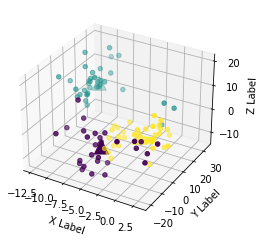

In [191]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=classification)
ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], marker='^', s=200, c=np.unique(classification))

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

## Ejercicio 9

## Ejercicio 10